# Microsoft Movie Analysis

## Importing libraries

We imported the Pandas, Numpy, Seaborn, and Matplotlib libraries so we could use them to manipulate the dataset and create visualizations for it.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from matplotlib.lines import Line2D

## Importing tn.movie_budgets.csv.gz and imdb.title.basics.csv.gz CSV Files and Merging them

In [2]:
df = pd.read_csv('data/zippedData/tn.movie_budgets.csv.gz')
df_2 = pd.read_csv('data/zippedData/imdb.title.basics.csv.gz')
df_meg = pd.merge(df, df_2, how='inner', left_on='movie', right_on='primary_title')
df_meg.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",tt1775309,Avatar,Abatâ,2011,93.0,Horror
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011,136.0,"Action,Adventure,Fantasy"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",tt6565702,Dark Phoenix,Dark Phoenix,2019,113.0,"Action,Adventure,Sci-Fi"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,141.0,"Action,Adventure,Sci-Fi"
4,7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200",tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi"


## Checking to see how much of the Column is missing based off Percentage

In [3]:
for col in df_meg.columns:
    pct_missing = np.mean(df_meg[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

id - 0.0%
release_date - 0.0%
movie - 0.0%
production_budget - 0.0%
domestic_gross - 0.0%
worldwide_gross - 0.0%
tconst - 0.0%
primary_title - 0.0%
original_title - 0.0%
start_year - 0.0%
runtime_minutes - 13.0%
genres - 2.0%


## Dropping as well as Splitting and Replacing Columns

In [4]:
cols_to_drop = ['runtime_minutes','start_year','original_title','id' ,'production_budget', 'release_date','tconst','primary_title']
df_mod_2 = df_meg.drop(cols_to_drop, axis=1)
df_mod_2["genres"] = df_mod_2["genres"].apply(lambda x: x.split(",") if type(x) == str else x)
df_mod_2["domestic_gross"] = df["domestic_gross"].str.replace(",","").str.replace("$","").astype(int)
df_mod_2["worldwide_gross"] = df["worldwide_gross"].str.replace(",","").str.replace("$","").astype(int)
df_mod_2.head()

,movie,domestic_gross,worldwide_gross,genres
0,Avatar,760507625,2776345279,[Horror]
1,Pirates of the Caribbean: On Stranger Tides,241063875,1045663875,"[Action, Adventure, Fantasy]"
2,Dark Phoenix,42762350,149762350,"[Action, Adventure, Sci-Fi]"
3,Avengers: Age of Ultron,459005868,1403013963,"[Action, Adventure, Sci-Fi]"
4,Avengers: Infinity War,620181382,1316721747,"[Action, Adventure, Sci-Fi]"


## Exploding the Genres Column as well as changing the Zeros to Nan then Dropping Nan's

In [5]:
df_explode = df_mod_2.explode('genres')
df_explode.replace(0, np.nan, inplace=True)
df_explode[df_explode.isna().any(axis=1)]
df_explode = df_explode.dropna()
print(df.isnull().sum())

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64


## Grouping by Genres means and sourting it by worldwide_gross as well as setting index to Movies

In [6]:
df_explode.groupby('genres').mean()
df_explode= df_explode.sort_values("worldwide_gross", ascending=False).set_index('movie')
df_top_50 = df_explode

## Plotting the data in a Bar Plot

In [ ]:
plt.figure(figsize=(10, 8))
sns.barplot(x='genres', 
            y='worldwide_gross',
            order=["Adventure","Animation","Fantasy","Musical",'Sci-Fi','Action', 'Family',"Western","History",'Documentary', 'Sport',"Comedy",'Thriller',"Reality-TV",'News','Biography','Drama', 'War','Crime','Mystery', 'Romance','Horror',"Music"],
            data=df_top_50,)
plt.ylabel("Worldwide Gross in Hundreds of Millions", size=14)
plt.xlabel("Genres", size=14)
plt.title(" Movies Worldwide Gross per Genre", size=18)
plt.tick_params(axis='x', labelrotation=90)
plt.savefig("images/grouped_barplot_Seaborn_barplot_Python_corrected.png")

## Work on tmdb_movies_data.csv.zip CSV

## Importing CSV and Dropping Columns

In [ ]:
df3 = pd.read_csv('data/zippedData/tmdb_movies_data.csv.zip')
cols_to_drop = ['id', 'imdb_id','cast', 'homepage', 'director','tagline', 'overview', 'production_companies','keywords' ,'vote_count','genres','release_date','release_year','vote_average','budget_adj','popularity','revenue_adj']
df_mod = df3.drop(cols_to_drop, axis=1)
df_mod.head()

## Replacing zeros with nan and dropping the nan's

In [ ]:
df_mod.replace(0, np.nan, inplace=True)
df_mod[df_mod.isna().any(axis=1)]
df_mod = df_mod.dropna()
print(df_mod.isnull().sum())

## Sorting Values in ascending order for Revenue

In [ ]:
df_mod= df_mod.sort_values("revenue", ascending=False)
df_mod.describe()

## Setting parameters based of a film has to be 40 min to be considered a movie and removing the outliers that skew the Data

In [ ]:
df_mod2 = df_mod.loc[(df_mod['runtime'] >= 40) & (df_mod['runtime'] <= 190) & (df_mod['revenue'] > 226830568) & (df_mod['revenue'] < 2068178225)]
df_mod2.head()

## Creating  variables for insertion into Graph

In [ ]:
runtime_25_percentile = df_mod2['runtime'].quantile(.25)
runtime_75_percentile = df_mod2['runtime'].quantile(.75)

## Plotting Data in a Scatter Plot

In [ ]:
fig, ax = plt.subplots(figsize=(14,7))
data = df_mod2[['runtime', 'revenue']]
x = data['runtime']
y = data['revenue']
plt.scatter(x, y)
z = np.polyfit(x, y, 0)
p = np.poly1d(z)
plt.plot(x,p(x),"r-")
plt.title('Runtime Comparison to Revenue', fontsize=35)
plt.xlabel('Movie Time - min -', fontsize=20)
plt.ylabel('Revenue in hundereds million', fontsize= 20)
plt.fill_between([runtime_25_percentile, runtime_75_percentile], max(y), facecolor='orange', alpha=.2)
plt.savefig("images/Runtime_Comparison_line_added.png")
plt.show()

# Working on Rotten Tomatoes Movies CSV

## Calling the CSV

In [ ]:
df_4 = pd.read_csv('data/zippedData/rotten_tomatoes_movies.csv.gz')
df_4.head(2)

## Dropping columns and Null values

In [ ]:
cols_to_drop = ['critics_consensus', 'movie_info','directors', 'authors', 'actors', 'streaming_release_date','runtime', 'production_company', 'tomatometer_count', 
                'audience_status', 'tomatometer_rating', 'audience_count', 'tomatometer_top_critics_count','audience_rating','original_release_date', 'rotten_tomatoes_link' ,'tomatometer_fresh_critics_count', 'tomatometer_rotten_critics_count']
df_dropped_colums = df_4.drop(cols_to_drop, axis=1)
df_dropped_colums.replace(0, np.nan, inplace=True)
df_dropped_colums[df_dropped_colums.isna().any(axis=1)]
df_dropped_colums = df_dropped_colums.dropna()
print(df_dropped_colums.isnull().sum())

## Splitting the Genres Column on the ","  and Exploding and isolating the Adventure Genres

In [ ]:
df_dropped_colums["genres"] = df_dropped_colums["genres"].apply(lambda x: x.split(",") if type(x) == str else x)

df_explode_2 = df_dropped_colums.explode('genres')

new_df = df_explode_2[df_explode_2['genres'].str.contains('Action & Adventure')]
new_df

## Setting Index replacing the Ratings with values and setting those values to 1 then Grouping by content_rating, tomatometer_status

In [ ]:
new_df.set_index('genres')
new_df.replace({'G': 0, 'PG': 1, 'PG-13': 2, 'NC17': 3, 'NR': 4, 'R': 5})
new_df['movie_count'] = 1
df_cor = new_df.groupby(['content_rating', 'tomatometer_status']).count()
df_cor

## Resetting Index and Dropping the Generes column to keep the Genre Column

In [ ]:
df_cor = df_cor.reset_index()
cols_to_drop = ['genres']
df_drop = df_cor.drop(cols_to_drop, axis=1)
df_drop.head()

## Ploting the data in a Bar Graph

In [ ]:
plt.figure(figsize=(10, 8))
sns.barplot(x='content_rating', 
            y='movie_count', 
            hue='tomatometer_status',
            order=["NC17","G","PG","PG-13",'NR', 'R'],
            data=df_cor, palette=['green', 'blue', 'red'])
plt.ylabel("Count Total", size=14)
plt.xlabel("Movie Rating", size=14)
plt.title("Rotten Tomatos Generated Ratings for Adventure Movies", size=18)
plt.savefig("images/Rotten_tomatose_Ratings.png")
plt.legend()

We used Pandas to read the next dataset, which contains information about which studios made which movies, what year each movie was made, and how much money each movie made. 

In [3]:
bommovie = pd.read_csv("./data/zippedData/bom.movie_gross.csv.gz")
bommovie

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


### Sorting
Using the sort values function, we reorganized the dataset from the movie with the highest domestic gross to the movie with the lowest domestic gross.

In [4]:
bommovie = bommovie.sort_values("domestic_gross", ascending = False)
bommovie

,title,studio,domestic_gross,foreign_gross,year
1872,Star Wars: The Force Awakens,BV,936700000.0,"1,131.6",2015
3080,Black Panther,BV,700100000.0,646900000,2018
3079,Avengers: Infinity War,BV,678800000.0,"1,369.5",2018
1873,Jurassic World,Uni.,652300000.0,"1,019.4",2015
727,Marvel's The Avengers,BV,623400000.0,895500000,2012
...,...,...,...,...,...
1975,Surprise - Journey To The West,AR,NaN,49600000,2015
2392,Finding Mr. Right 2,CL,NaN,114700000,2016
2468,Solace,LGP,NaN,22400000,2016
2595,Viral,W/Dim.,NaN,552000,2016


### Null Values
Next, we figured out what percentage of information about movies was missing.

In [5]:
pct_missing = np.mean(bommovie["foreign_gross"].isnull())
print('{} - {}%'.format("foreign_gross", round(pct_missing*100)))

pct_missing = np.mean(bommovie["domestic_gross"].isnull())
print('{} - {}%'.format("domestic_gross", round(pct_missing*100)))

pct_missing = np.mean(bommovie["studio"].isnull())
print('{} - {}%'.format("studio", round(pct_missing*100)))

pct_missing = np.mean(bommovie["year"].isnull())
print('{} - {}%'.format("year", round(pct_missing*100)))

pct_missing = np.mean(bommovie["title"].isnull())
print('{} - {}%'.format("title", round(pct_missing*100)))

foreign_gross - 40.0%
domestic_gross - 1.0%
studio - 0.0%
year - 0.0%
title - 0.0%


40% of values were missing in the foreign gross column and 1% of values were missing in the domestic gross column. We dropped all of these null values to ensure the accuracy of our analyses. Due to the significant amount of data dropped from the foreign gross column, we chose to tighten our focus to domestic gross and use that as the primary indicator of movie success.

In [6]:
bommovie = bommovie.dropna(subset=['foreign_gross'])

In [7]:
bommovie = bommovie.dropna(subset=['domestic_gross'])

Then, we checked that all null values were gone.

In [8]:
pct_missing = np.mean(bommovie["foreign_gross"].isnull())
print('{} - {}%'.format("foreign_gross", round(pct_missing*100)))
pct_missing = np.mean(bommovie["domestic_gross"].isnull())
print('{} - {}%'.format("domestic_gross", round(pct_missing*100)))

foreign_gross - 0.0%
domestic_gross - 0.0%


### Making a New Dataframe
Then, we made another dataframe from the first 20 rows of the previous dataframe. Because we sorted the last dataframe by highest domestic gross, this new dataframe represents the top 20 highest grossing movies.

In [9]:
top20 = bommovie.head(20)
top20

,title,studio,domestic_gross,foreign_gross,year
1872,Star Wars: The Force Awakens,BV,936700000.0,"1,131.6",2015
3080,Black Panther,BV,700100000.0,646900000,2018
3079,Avengers: Infinity War,BV,678800000.0,"1,369.5",2018
1873,Jurassic World,Uni.,652300000.0,"1,019.4",2015
727,Marvel's The Avengers,BV,623400000.0,895500000,2012
2758,Star Wars: The Last Jedi,BV,620200000.0,712400000,2017
3082,Incredibles 2,BV,608600000.0,634200000,2018
2323,Rogue One: A Star Wars Story,BV,532200000.0,523900000,2016
2759,Beauty and the Beast (2017),BV,504000000.0,759500000,2017
2324,Finding Dory,BV,486300000.0,542300000,2016


We then determined which studio made the most movies in our top 20.

In [10]:
top20['studio'].value_counts(normalize=True) * 100

BV      65.0
Uni.    10.0
LGF     10.0
WB      10.0
Sony     5.0
Name: studio, dtype: float64

We learned BV is the studio responsible for 65% of the top 20 highest grossing movies.

### Making a Visualization
Once we discovered  Buena Vista (abbreviated "BV") is the movie studio that makes the majority of highest grossing movies, we made a bar chart to communicate this valuable information.

First, we created a color palette so each studio would be represented by a certain color.

In [11]:
custom_palette = []
labels = [ ]
for x in top20["studio"]:
    labels.append(x)
    if x == "BV":
        custom_palette.append('lightskyblue')
    elif x=="Uni.":
        custom_palette.append('mediumblue')
    elif x=="WB":
        custom_palette.append('darkslateblue')
    elif x=="LGF":
        custom_palette.append('blueviolet')
    else:
        custom_palette.append('plum')

In [12]:
labels = set(labels)

Following this is the code to create our graph:

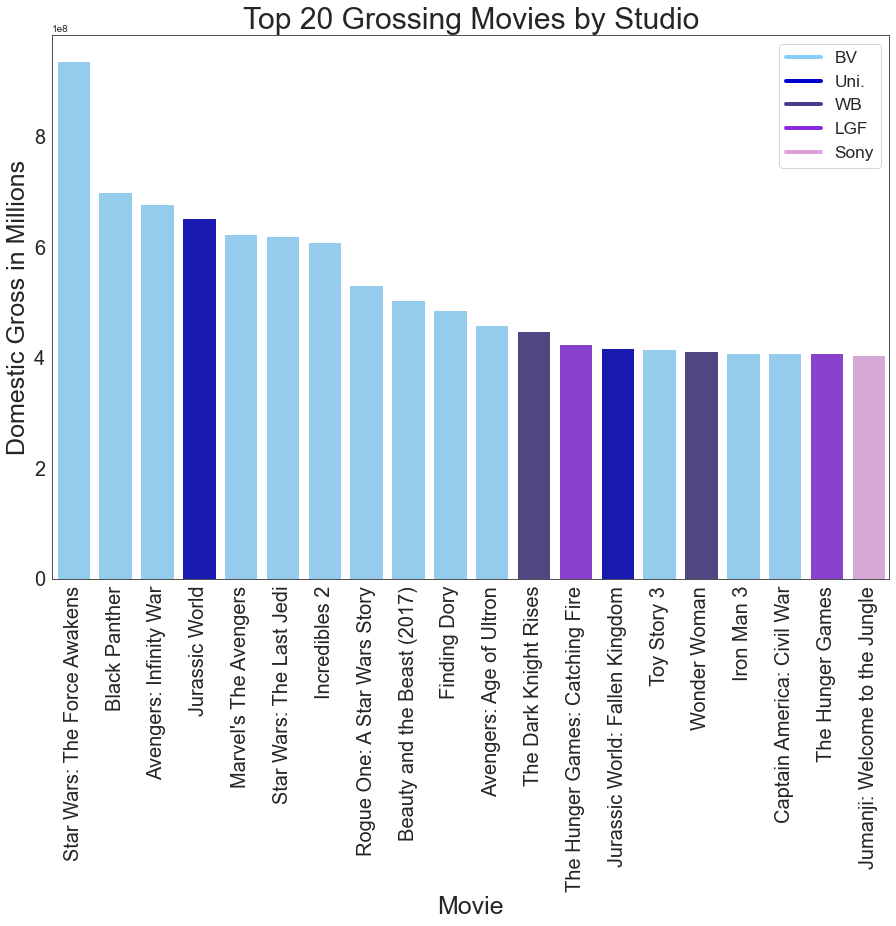

In [13]:
x = top20["title"]
y = top20["domestic_gross"]

plt.figure(figsize=(15, 10))
sns.set_style('white')
sns.set_palette("bright")
bar = sns.barplot(x = x,
            y = y,
            palette=custom_palette)
custom_lines = [Line2D([0], [0], color="lightskyblue", lw=4),
                Line2D([0], [0], color="mediumblue", lw=4),
                Line2D([0], [0], color="darkslateblue", lw=4),
                Line2D([0], [0], color="blueviolet", lw=4),
                Line2D([0], [0], color="plum", lw=4)]
plt.legend(custom_lines, ['BV', 'Uni.', 'WB', "LGF", "Sony"], fontsize="xx-large") ###

plt.ylabel("Domestic Gross in Millions", size=25)
plt.xlabel("Movie", size=25)
bar.tick_params(axis='y', labelsize=20)
plt.xticks(rotation = 90, size = 20)
plt.title("Top 20 Grossing Movies by Studio", size=30)

plt.savefig("top20_barplot_Seaborn_barplot_Python.png")

plt.show();

Now we have a strong reccomendation we can make to Microsoft: 

Their best bet for making the highest possible domestic gross is using Buena Vistas studios or modeling their own studio off of Buena Vistas studios.